In [1]:
def leggi_file_txt(nome_file):
    app=open(nome_file).read().split('\n\n')
    out=[app[0].split('\n'), app[1][:-1]]
    return out


nome_file = 'input_day15.txt'
nome_file_test= 'input_day15_test.txt'
data= leggi_file_txt(nome_file)
data_test=leggi_file_txt(nome_file_test)

In [20]:
#Funzioni parte 1
import matplotlib.pyplot as plt

def stampa(lista):
    print(*[' '.join(map(str,item)) for item in lista], sep='\n')

def posizione_iniziale(lista):
    for i in range(len(lista)):
        for j in range(len(lista[0])):
            if lista[i][j]=='@':
                return (i,j)

def crea_matrice(lista):
    out=[]
    for i in range(len(lista)):
        app=[]
        for j in range(len(lista[0])):
            if lista[i][j]=='#':
                app.append(-1)
            elif lista[i][j]=='.':
                app.append(0)
            elif lista[i][j]=='@':
                app.append(10)
            else:
                app.append(1)
        out.append(app)
    return out


def punteggio(matrice):
    out=0
    for i in range(len(matrice)):
        for j in range(len(matrice)):
            if matrice[i][j]==1:
                out+=i*100+j
    return out
    

def movimento(matrice, posizione, direzione):
    if direzione=='^':

        if matrice[posizione[0]-1][posizione[1]]==-1:
            return matrice, posizione
        
        if matrice[posizione[0]-1][posizione[1]]==0:
            matrice[posizione[0]][posizione[1]]=0
            matrice[posizione[0]-1][posizione[1]]=10
            posizione=[posizione[0]-1,posizione[1]]

            return matrice, posizione

        if matrice[posizione[0]-1][posizione[1]]==1:
            k=0
            while(matrice[posizione[0]-1-k][posizione[1]]!=-1 and matrice[posizione[0]-1-k][posizione[1]]!=0):
                k+=1
            if matrice[posizione[0]-1-k][posizione[1]]==-1:
                return matrice, posizione
            elif matrice[posizione[0]-1-k][posizione[1]]==0:
                matrice[posizione[0]-1-k][posizione[1]]=1
                matrice[posizione[0]-1][posizione[1]]=10
                matrice[posizione[0]][posizione[1]]=0
                posizione=[posizione[0]-1,posizione[1]]
                return matrice, posizione
            else:
                raise('Qualcosa è andato storto - ^')

    if direzione=='v':

        if matrice[posizione[0]+1][posizione[1]]==-1:
            return matrice, posizione
        
        if matrice[posizione[0]+1][posizione[1]]==0:
            matrice[posizione[0]][posizione[1]]=0
            matrice[posizione[0]+1][posizione[1]]=10
            posizione=[posizione[0]+1,posizione[1]]

            return matrice, posizione

        if matrice[posizione[0]+1][posizione[1]]==1:
            k=0
            while(matrice[posizione[0]+1+k][posizione[1]]!=-1 and matrice[posizione[0]+1+k][posizione[1]]!=0):
                k+=1
            if matrice[posizione[0]+1+k][posizione[1]]==-1:
                return matrice, posizione
            elif matrice[posizione[0]+1+k][posizione[1]]==0:
                matrice[posizione[0]+1+k][posizione[1]]=1
                matrice[posizione[0]+1][posizione[1]]=10
                matrice[posizione[0]][posizione[1]]=0
                posizione=[posizione[0]+1,posizione[1]]
                return matrice, posizione
            else:
                raise('Qualcosa è andato storto - v')


    if direzione=='>':

        if matrice[posizione[0]][posizione[1]+1]==-1:
            return matrice, posizione
        
        if matrice[posizione[0]][posizione[1]+1]==0:
            matrice[posizione[0]][posizione[1]]=0
            matrice[posizione[0]][posizione[1]+1]=10
            posizione=[posizione[0],posizione[1]+1]

            return matrice, posizione

        if matrice[posizione[0]][posizione[1]+1]==1:
            k=0
            while(matrice[posizione[0]][posizione[1]+1+k]!=-1 and matrice[posizione[0]][posizione[1]+1+k]!=0):
                k+=1
            if matrice[posizione[0]][posizione[1]+1+k]==-1:
                return matrice, posizione
            elif matrice[posizione[0]][posizione[1]+1+k]==0:
                matrice[posizione[0]][posizione[1]+1+k]=1
                matrice[posizione[0]][posizione[1]+1]=10
                matrice[posizione[0]][posizione[1]]=0
                posizione=[posizione[0],posizione[1]+1]
                return matrice, posizione
            else:
                raise('Qualcosa è andato storto - >')

    
    if direzione=='<':

        if matrice[posizione[0]][posizione[1]-1]==-1:
            return matrice, posizione
        
        if matrice[posizione[0]][posizione[1]-1]==0:
            matrice[posizione[0]][posizione[1]]=0
            matrice[posizione[0]][posizione[1]-1]=10
            posizione=[posizione[0],posizione[1]-1]

            return matrice, posizione

        if matrice[posizione[0]][posizione[1]-1]==1:
            k=0
            while(matrice[posizione[0]][posizione[1]-1-k]!=-1 and matrice[posizione[0]][posizione[1]-1-k]!=0):
                k+=1
            if matrice[posizione[0]][posizione[1]-1-k]==-1:
                return matrice, posizione
            elif matrice[posizione[0]][posizione[1]-1-k]==0:
                matrice[posizione[0]][posizione[1]-1-k]=1
                matrice[posizione[0]][posizione[1]-1]=10
                matrice[posizione[0]][posizione[1]]=0
                posizione=[posizione[0],posizione[1]-1]
                return matrice, posizione
            else:
                raise('Qualcosa è andato storto - <')
    else:
        return matrice, posizione


1465523


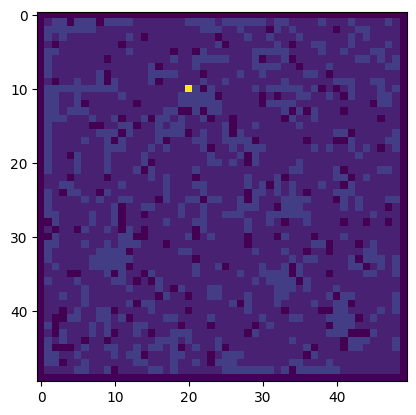

In [23]:
# Calcolo parte 1

answer_1=0

raw=data
mappa=[item for lista in raw[:-1] for item in lista]
istruzioni=list(raw[-1])


posizione=posizione_iniziale(mappa)
griglia=crea_matrice(mappa)


for istruzione in istruzioni:
    griglia, posizione = movimento(griglia, posizione, istruzione)


answer_1=punteggio(griglia)
print(answer_1)
plt.imshow(griglia)